# Advanced search and query

<div>
    <img style='width: 220px;height: 100px;float: left;' src="./Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="./Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="./Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebok shows how to explore a product in more detail including its metadata, measurements and metadata of datasets. It also shows how to query for measurements of products. 

**When accessing metadata of a certain product it is possible to discover whether that product has any data in the given spatial and temporal bounds.**

## Exploring products and metadata

First the enviroment is loaded and initialized.

In [1]:
import datacube
%matplotlib inline
dc = datacube.Datacube(app='sample_2', env='acube')

To list the products `list_products()` is called. It is possible to list only certain columns and rows. To see the product columns we call the `columns` attribute

In [2]:
prodlist = dc.list_products()
prodlist.columns

Index(['name', 'description', 'quality_check_flag', 'lon', 'granule_id',
       'format', 'relative_orbit_number', 'product_type',
       'cloud_cover_percentage', 'instrument', 'orbit_direction',
       'creation_time', 'platform', 'time', 'label', 'resolution_class',
       'platform_number', 'lat', 'measurement_mode', 'crs', 'resolution',
       'tile_size', 'spatial_dimensions'],
      dtype='object')

Below we list only the name, description and platform, for products captured by the Sentinel-1 platform.

In [3]:
display_columns = ['name', 'description', 'platform']
prodlist[prodlist['platform'] == 'Sentinel-1'][display_columns].dropna()

name                                        description  \
id                                                                       
18   GMR_Sentinel_1  Backscatter from a unit ground area projected ...   
23  SIG0_Sentinel_1  Backscatter returned to the satellites antenna...   

      platform  
id              
18  Sentinel-1  
23  Sentinel-1

To list the measurements (bands/polarisations) from a specific product we can use `pandas.DataFrame.loc` method. The method `get_level_values` fetches the index values from the measurements DataFrame. In the case of the measurements the 0 index refers to the product column and the 1 index refers to the measurement colum. We can see some metadata including the data type, nodata value and units of the measured value. Each dataset in the `GMR` product contains two measurements, the VV polarization and the VH polarization.

In [4]:
product = 'GMR_Sentinel_1'
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

name  dtype units  nodata  \
product        measurement                             
GMR_Sentinel_1 VV            VV  int16    dB   -9999   
               VH            VH  int16    dB   -9999   

                                                          aliases  
product        measurement                                         
GMR_Sentinel_1 VV           [band_1, band_01, B01, Band1, Band_1]  
               VH           [band_2, band_02, B02, Band2, Band_2]

In [5]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2017-04-01', '2017-04-15')
}

To display available datasets along with metadata we can use the `find_datasets_lazy` method and pass in the spatio-temporal bounds. We are requesting the id, datetime, lower left coordinates, image paths and the custom measurement mode. We can see there are 7 datasets below.

In [6]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print('*'*100)
    print('ID: ', dataset.id)
    print('DATETIME: ', dataset.center_time)
    print('LL_COORDS: ', dataset.metadata_doc['extent']['coord']['ll'])
    print('IMAGE_VV: ', dataset.metadata_doc['image']['bands']['VV']['path'])
    print('IMAGE_VH: ', dataset.metadata_doc['image']['bands']['VH']['path'])
    print('MEASUREMENT MODE: ', dataset.metadata_doc['image']['measurement_mode'])
print('*'*100)

****************************************************************************************************
ID:  3153d189-eee1-4064-ad55-b23242c844d4
DATETIME:  2017-04-07 05:01:07.500000
LL_COORDS:  {'lat': 47.97836637131796, 'lon': 15.455732336236064}
IMAGE_VV:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E052N016T1/gmr/GMR------_SGRTA01_S1B_IWGRDH1VVD_20170407_050055--_EU010M_E052N016T1.tif
IMAGE_VH:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampled/A0105/EQUI7_EU010M/E052N016T1/gmr/GMR------_SGRTA01_S1B_IWGRDH1VHD_20170407_050055--_EU010M_E052N016T1.tif
MEASUREMENT MODE:  IW
****************************************************************************************************
ID:  bfc957dd-9141-41f8-8ed9-1165cfde5161
DATETIME:  2017-04-13 05:02:03.500000
LL_COORDS:  {'lat': 47.97836637131796, 'lon': 15.455732336236064}
IMAGE_VV:  /eodc/products/ADatacube/Sentinel-1_CSAR/IWGRDH/preprocessed/datasets/resampl

## Querying measurements, datasets and visualization

By specifying the `load` function we can load the data into a desired coordinate reference frame and desired resolution. By passing in the `measurements` we load only the VV polarisation. It is possible to load any number of measurements in this manner and use them further.

In [7]:
data = dc.load(product=product, 
               measurements=['VV'], 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:      (time: 10, x: 1526, y: 2250)
Coordinates:
  * time         (time) datetime64[ns] 2017-04-01T05:01:38.500000 ... 2017-04...
  * y            (y) float64 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x            (x) float64 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 32633
Data variables:
    VV           (time, y, x) int16 -1050 -884 -992 -1107 ... -9999 -9999 -9999
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

Lines below show how data can be subset from the `Dataset` into a `DataArray` and how this data may be plotted using the `matplotlib` `imshow` method. Tutorials on `matplotlib` can be found at https://matplotlib.org/tutorials/index.html

In [8]:
data_plot_vv = data.VV
data_plot_vv

<xarray.DataArray 'VV' (time: 10, y: 2250, x: 1526)>
array([[[-1050,  -884,  -992, ..., -1262,  -735,  -793],
        [-1076,  -985, -1012, ..., -1546, -1005, -1012],
        [ -818,  -922,  -737, ..., -1521, -1281, -1150],
        ...,
        [ 1234,   915,   468, ...,     1,  -539, -1115],
        [ 1061,   718,   379, ...,   176,   -37,  -338],
        [  592,   428,  -116, ...,    85,   165,    76]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[ -670,  -433,  -570, ...,  -955,  -969, -1164],
        [ -954,  -622,  -725, ..., -1181, -1015, -1078],
        [-1218,  -927,  -769, ..., -1379, -1317, -1219],
        ...,
...
        ...,
        [  592,   411,   287, ...,  -228,  -317,  -470],
        [  443,   425,   373, ...,    -7,  -119,  -173],
        [   88,   154,   132, ...,  -106,  -267,    -5]],

       [[ -838,  -797,  -749, ..., -1705, -1420, -1327],
        [ -700,  -691, -1002, ..., -1489, -1382, -1323],
        [ -749,  -760,  -786, ..., -1274, -1332, -1393],
        ...,
        [  855,   760,   482, ...,   102,   -91,  -305],
        [  366,   308,   108, ...,   220,   155,    49],
        [   61,   -52,   108, ...,    26,   145,   188]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2017-04-01T05:01:38.500000 ... 2017-04...
  * y            (y) float64 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x            (x) float64 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 32633
Attributes:
    units:         dB
    nodata:        -9999
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

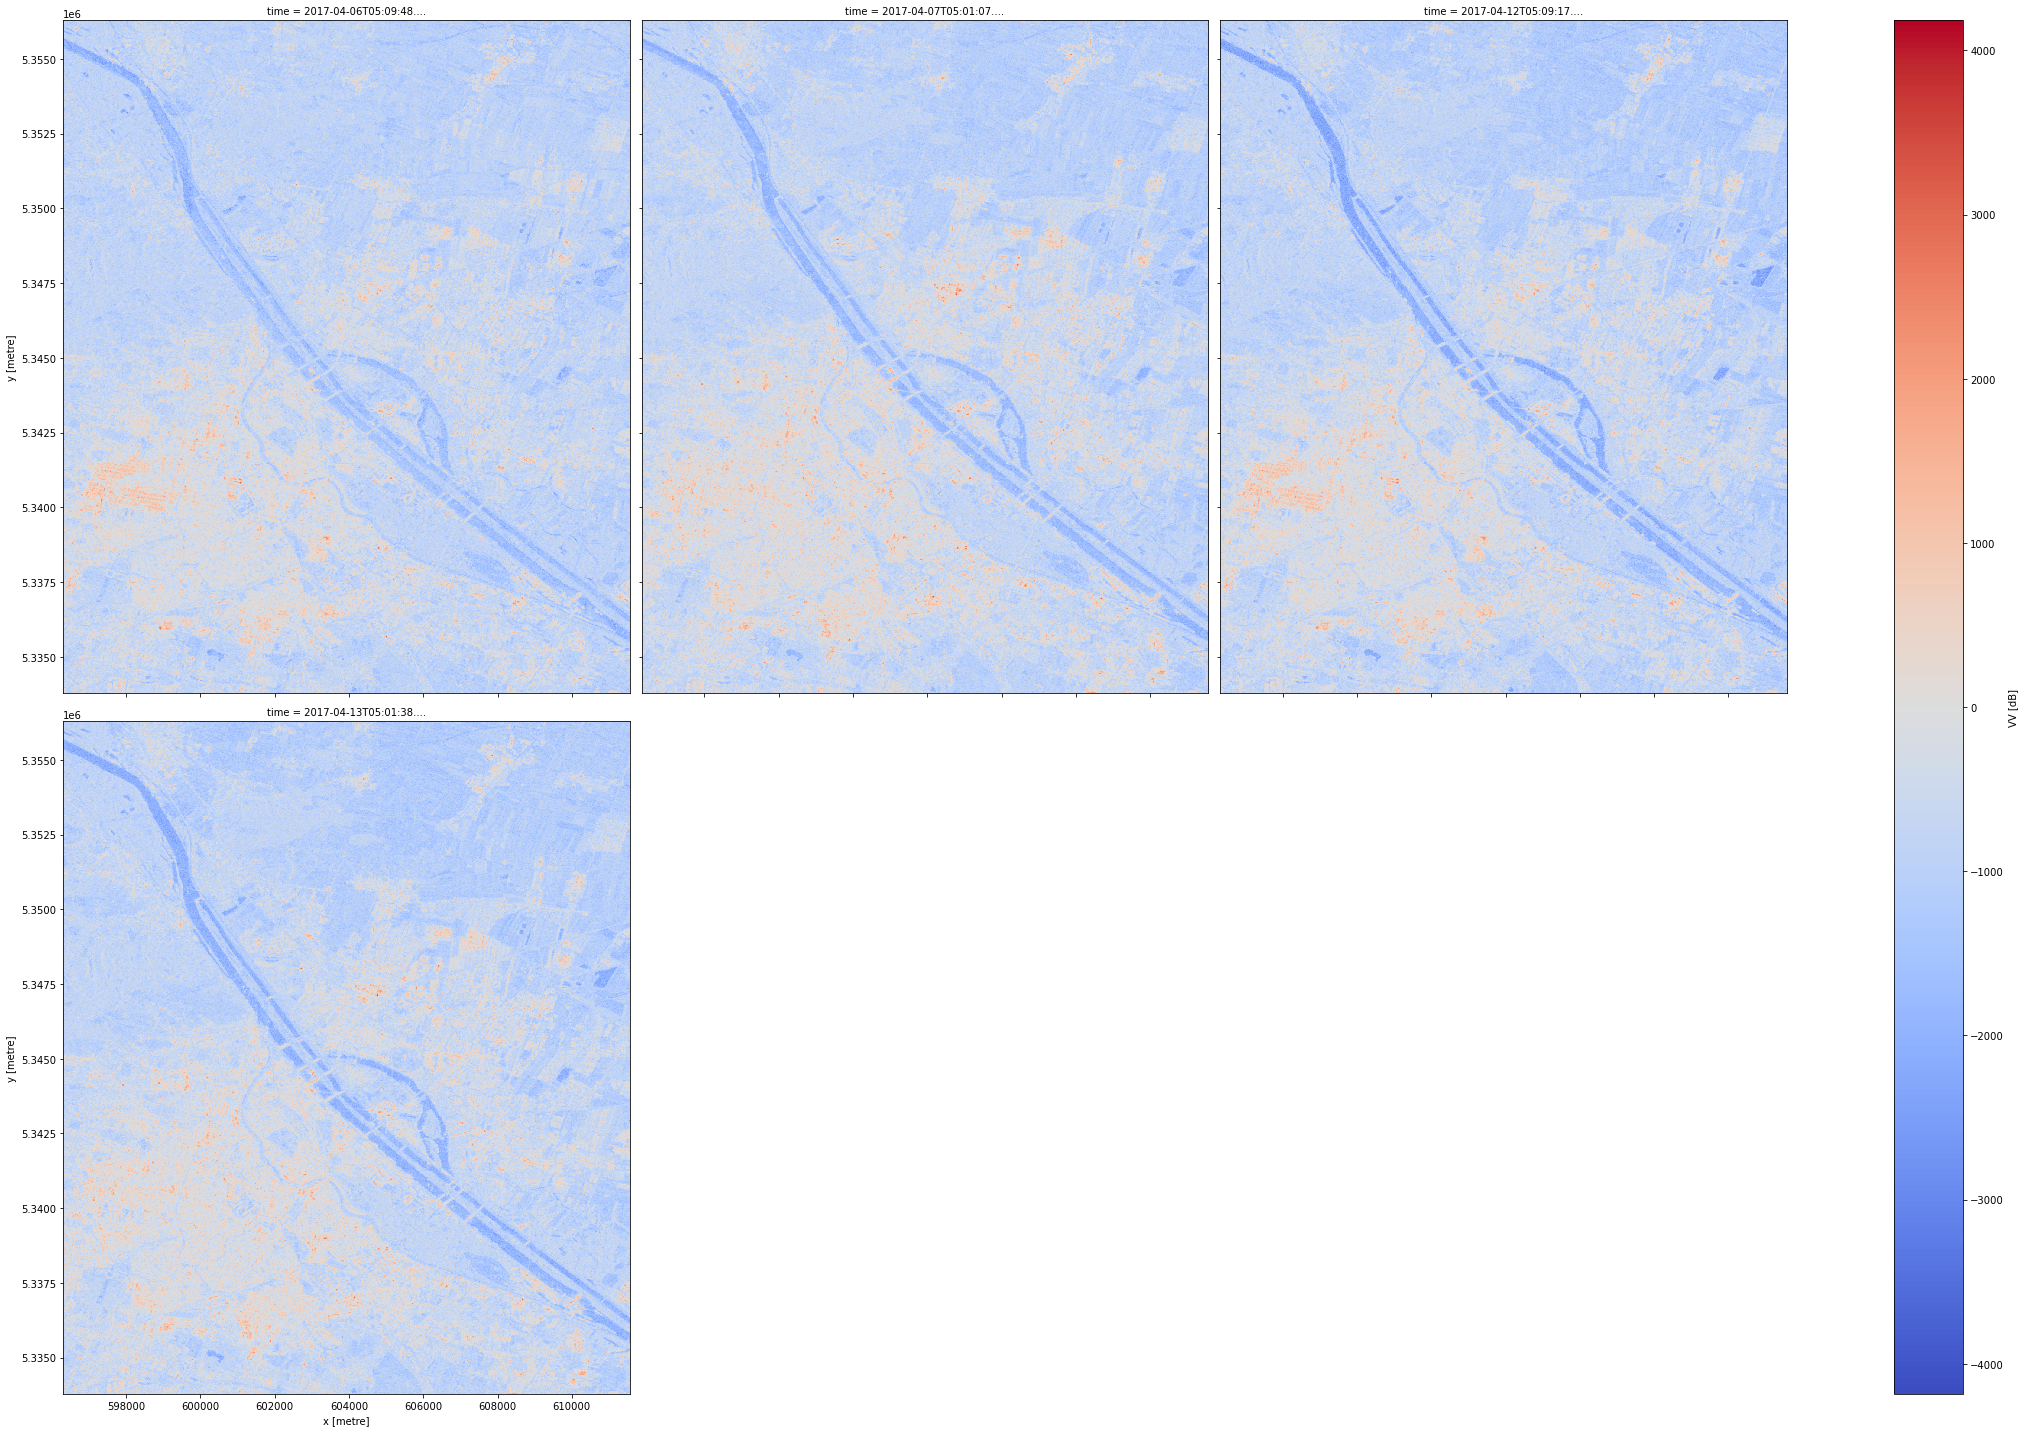

In [9]:
data_plot_vv = data_plot_vv.where(data_plot_vv != data_plot_vv.attrs['nodata']).dropna(dim='time')
data_plot_vv.plot.imshow(x='x', 
                      y='y',
                      col='time',
                      size=10,
                      col_wrap=3,
                      cmap='coolwarm')

## Downloading the data

Cell below exports all the data points in GeoTIFF. The files appear on the left and it may be downloaded through the interface.

In [10]:
from datacube.utils.cog import write_cog
filename = 'GMR'
for i in range(len(data_plot_vv.time)):
    date = str(data_plot_vv.isel(time=i).time.data)[:-19] # Without time
    filename2=f'{filename}_{date}.tif'
    print('Saved: ', filename2)
    write_cog(data_plot_vv.isel(time=i), filename2)

Saved:  GMR_2017-04-06.tif
Saved:  GMR_2017-04-07.tif
Saved:  GMR_2017-04-12.tif
Saved:  GMR_2017-04-13.tif
